<a href="https://colab.research.google.com/github/ShodekeA/MyProjects/blob/main/Choosing_the_right_estimatorNEWFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [19]:
import pandas as pd
import numpy as np

#data = pd.read_csv('Agora.csv')
data = pd.read_csv('city-of-london-stop-and-search.csv')

In [20]:
#Get more information about the data
data.shape


(4679, 15)

In [ ]:
#which columns can I delete?
data.head()


In [ ]:
df = data
df.head()

In [24]:
#remove columns 3, 4, 5, 6 because they have lots of null values

df = df.drop(labels = ["Date", "Part of a policing operation", "Latitude", "Longitude", "Policing operation"], axis=1)


In [25]:
features = ['Type', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome linked to object of search',
       'Removal of more than just outer clothing']

In [ ]:
#drop null values
x = df.loc[:, features]
y = df.loc[:, 'Outcome']
x.dropna(inplace=True)
y = y.iloc[x.index]
print(x.shape)
print(y.shape)
x.head()

In [37]:
y.head()

0    Offender given drugs possession warning
2                 Suspect summonsed to court
4                           Suspect arrested
7                           Suspect arrested
8                 Suspect summonsed to court
Name: Outcome, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 

for col in x.columns:
    le = LabelEncoder()
    x[col]= le.fit_transform(x[col])
    
x.head()

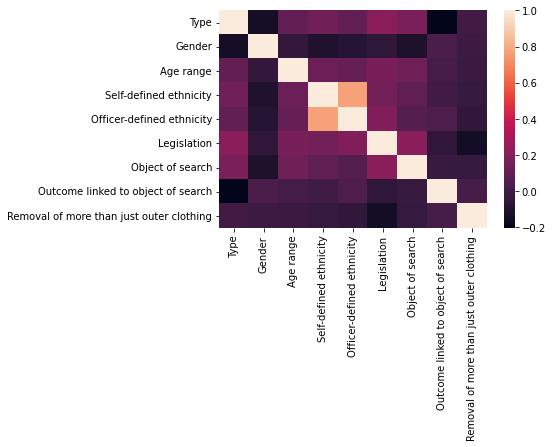

In [28]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6
corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

In [29]:
#print(dict(y.value_counts()).keys())
print('*************')
all_label_values = list(dict(y.value_counts()).keys())
logic = lambda x: 0 if (x == all_label_values[0] or x== all_label_values[1]) else 1
y2 = y.map(logic)
y2[:10]

*************


0     1
2     1
4     1
7     1
8     1
9     1
13    1
14    1
17    1
18    1
Name: Outcome, dtype: int64

In [30]:
#Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y2,
                             test_size=0.2, random_state=42)

In [31]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

0.8258575197889182
0.8271767810026385
0.8311345646437994
0.8245382585751979
0.8271767810026385
0.8179419525065963


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [32]:
# Based on Accuracy, Naive Bayes is based selection

from sklearn.naive_bayes import GaussianNB
final_model = GaussianNB()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.8311345646437994


In [35]:
from joblib import dump
dump(final_model, 'filename.joblib') 

['filename.joblib']

### Q. Identify candidate questions for your machine learning project

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


### Q. Generate a descriptive statistics report for the columns in your dataset

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/